<a href="https://colab.research.google.com/github/akshat-020/Credit-Card-Fraud-Detection/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### **Fraudulent percentage**

In [65]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
outlier_fraction = fraudulent/float(normal)

In [6]:
fraud_percentage

0.17

In [60]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     27

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,...,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,...,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,0.008911,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,...,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,1.012371,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,...,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,-0.328041,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,...,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,-0.258315,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,...,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,-0.033742,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.000000


In [8]:
df.drop(['Time'], axis=1, inplace=True)

Normalise the Amount column

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.drop_duplicates(inplace=True)

In [10]:
df.shape


(275663, 30)

Split the data:


In [11]:

X= df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y=df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (206747, 29)
Number transactions y_train dataset:  (206747,)
Number transactions X_test dataset:  (68916, 29)
Number transactions y_test dataset:  (68916,)


In [12]:
%matplotlib inline

In [13]:
#@title
#sns.pairplot(df)

In [14]:
#sns.barplot(x='V1', y='Amount',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


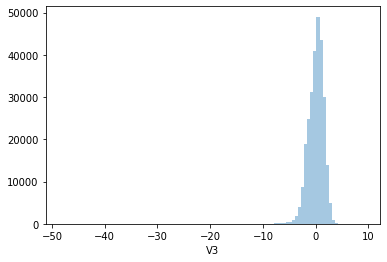

In [15]:
sns.distplot(df['V3'],bins=100,kde=False)

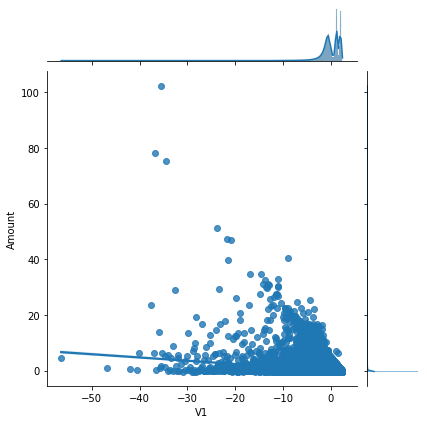

In [16]:
sns.jointplot(x=df['V1'], y=df['Amount'],kind='reg')

In [17]:
dfc=df.corr()

In [18]:
dfc

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.009002,0.005952,-0.000042,-0.018593,-0.005789,-0.006843,-0.000490,-0.007093,0.003115,...,0.006004,0.003634,-0.007504,-0.009327,-0.004446,-0.002436,-0.014628,-0.003555,-0.225854,-0.094718
V2,0.009002,1.000000,0.004976,-0.004095,0.004655,0.004290,0.004866,0.003743,0.001116,0.002764,...,-0.003881,0.002909,-0.003689,0.001974,-0.002837,-0.000296,0.007252,0.001458,-0.534153,0.084754
V3,0.005952,0.004976,1.000000,-0.000721,0.011020,0.014780,-0.014016,0.003733,-0.002896,-0.011064,...,0.001818,-0.004203,0.002183,0.009782,0.004091,0.003596,-0.008780,-0.002454,-0.220547,-0.185772
V4,-0.000042,-0.004095,-0.000721,1.000000,0.006710,0.012535,0.000806,0.004996,0.001395,0.003366,...,-0.000623,0.001581,-0.000155,0.005759,0.000173,-0.001105,0.002517,0.000028,0.100626,0.130313
V5,-0.018593,0.004655,0.011020,0.006710,1.000000,-0.029701,-0.009107,-0.002605,-0.000786,-0.002818,...,0.003439,0.002971,-0.001058,-0.012634,-0.004862,-0.001568,-0.006116,-0.000711,-0.390280,-0.088642
V6,-0.005789,0.004290,0.014780,0.012535,-0.029701,1.000000,0.013087,-0.012301,-0.002290,-0.002723,...,-0.001584,0.002355,-0.000221,-0.021098,-0.006673,0.000702,-0.001577,0.000617,0.224967,-0.044777
V7,-0.006843,0.004866,-0.014016,0.000806,-0.009107,0.013087,1.000000,-0.000987,-0.001657,-0.012246,...,0.008635,-0.001701,0.003458,0.005375,0.002070,-0.000459,-0.003977,0.001329,0.401573,-0.173292
V8,-0.000490,0.003743,0.003733,0.004996,-0.002605,-0.012301,-0.000987,1.000000,0.000168,0.000239,...,0.018806,-0.005182,0.006461,-0.006000,-0.002827,-0.001122,-0.000108,0.000201,-0.104572,0.033364
V9,-0.007093,0.001116,-0.002896,0.001395,-0.000786,-0.002290,-0.001657,0.000168,1.000000,-0.004957,...,0.001744,0.000742,-0.001739,-0.002454,-0.000358,0.005307,0.008066,0.006487,-0.041446,-0.094583
V10,0.003115,0.002764,-0.011064,0.003366,-0.002818,-0.002723,-0.012246,0.000239,-0.004957,1.000000,...,0.002396,-0.003012,0.001760,0.001015,0.002499,-0.000859,0.011495,0.009956,-0.104586,-0.208104


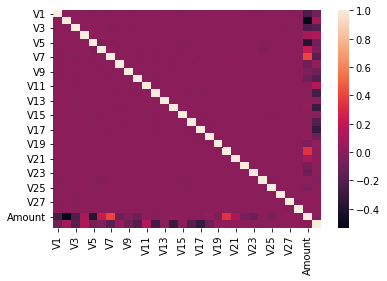

In [19]:
sns.heatmap(dfc)

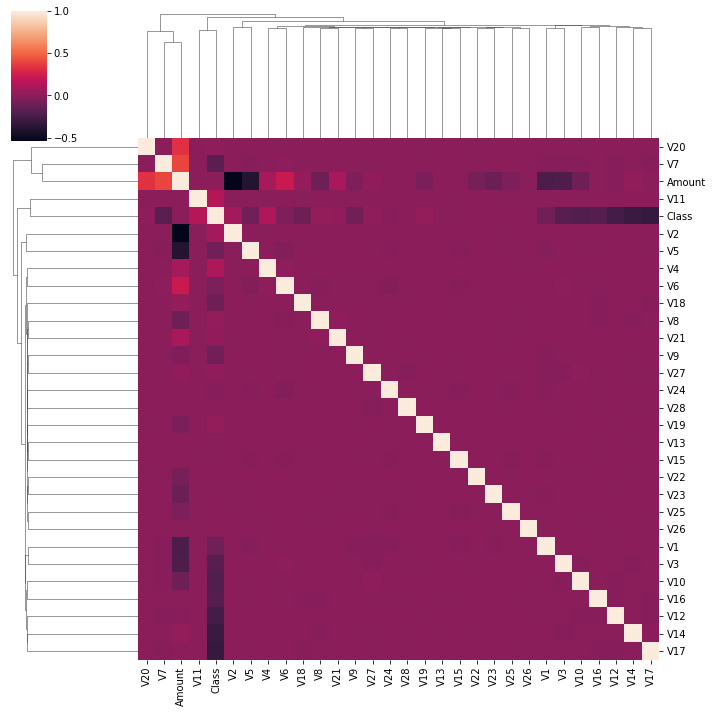

In [20]:
#df.pivot_table(index='',columns='',values='')
sns.clustermap(dfc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


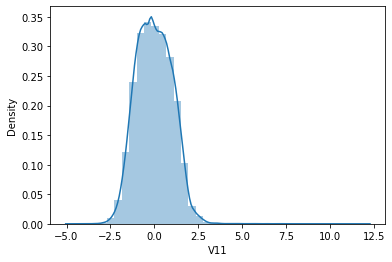

In [21]:
sns.distplot(df['V11'],bins=40)

LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr=LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_out=lr.predict(X_test)

In [49]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
print(classification_report(y_test, y_out))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.82      0.56      0.67       128

    accuracy                           1.00     68916
   macro avg       0.91      0.78      0.83     68916
weighted avg       1.00      1.00      1.00     68916



In [52]:
auc_lr = roc_auc_score(y_test, y_out)
print(auc_lr)

0.7811337006454614


accuracy


In [31]:

print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test,y_out)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test,y_out)))



Accuracy score of the Logistic Regression model is 0.9989552498694062
F1 score of the Logistic Regression model is 0.6666666666666666


### **SMOTE(synthetic minority oversampling technique)**

In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 206402 

After OverSampling, the shape of train_X: (412804, 29)
After OverSampling, the shape of train_y: (412804,) 

After OverSampling, counts of label '1': 206402
After OverSampling, counts of label '0': 206402


In [51]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
auc = roc_auc_score(y_test, predictions)
print(auc)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     68788
           1       0.06      0.91      0.12       128

    accuracy                           0.97     68916
   macro avg       0.53      0.94      0.55     68916
weighted avg       1.00      0.97      0.99     68916

0.9442819332587079


In [54]:
f1_score(y_test, predictions)

0.11705852926463231


### **K-Nearest Neighbors**

In [35]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier

In [36]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [37]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.999288989494457
F1 score of the K-Nearest Neighbors model is 0.7949790794979079


### **Support Vector Machines**

In [38]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [39]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))


Accuracy score of the Support Vector Machines model is 0.999318010331418
F1 score of the Support Vector Machines model is 0.7813953488372093


### **RANDOM FOREST/Decision tree**


In [40]:

DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [41]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))



Accuracy score of the Decision Tree model is 0.9991729061466132
F1 score of the Decision Tree model is 0.7574468085106382
Accuracy score of the Random Forest model is 0.9991438853096524
F1 score of the Random Forest model is 0.728110599078341


### **XGBOOST**


In [42]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [45]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))
print(classification_report(y_test, xgb_yhat))

Accuracy score of the XGBoost model is 0.9994486040977422
F1 score of the XGBoost model is 0.831858407079646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.96      0.73      0.83       128

    accuracy                           1.00     68916
   macro avg       0.98      0.87      0.92     68916
weighted avg       1.00      1.00      1.00     68916



In [53]:
auc_xgb = roc_auc_score(y_test, xgb_yhat)
print(auc_xgb)

0.8671584251613653



### **Isolation Forest and Lof clustersing**
---



In [68]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X_train), 
                                       contamination=outlier_fraction,random_state=10, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    
}

In [73]:
n_outliers = fraudulent
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_test)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_test)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_test).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (275663) is greater than the total number of samples (206747). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation Forest: 178
Accuracy Score :
0.9974171455104766
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.26      0.21      0.23       128

    accuracy                           1.00     68916
   macro avg       0.63      0.60      0.62     68916
weighted avg       1.00      1.00      1.00     68916

Local Outlier Factor: 245
Accuracy Score :
0.9964449474722851
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.01      0.01      0.01       128

    accuracy                           1.00     68916
   macro avg       0.50      0.50      0.50     68916
weighted avg       1.00      1.00      1.00     68916

